In [1]:
import pandas as pd

data_files={
     'amazon':'sentiment-labels/amazon_cells_labelled.txt',
     'yelp':'sentiment-labels/yelp_labelled.txt',
     'imdb':'sentiment-labels/imdb_labelled.txt',
}

df_list=[]
for key, value in data_files.items():
    df=pd.read_csv(value,names=['sentence','label'],sep='\t')
    df['source']=key
    df_list.append(df)
df=pd.concat(df_list)

In [2]:
from sklearn.model_selection import train_test_split

df_yelp=df[df['source']=='yelp']
sentences=df_yelp['sentence'].values
labels=df_yelp['label'].values
sentence_train,sentence_test,label_train,label_test=train_test_split(sentences,labels,test_size=0.25,random_state=1000)

In [4]:
from keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentence_train)
x_train=tokenizer.texts_to_sequences(sentence_train)
x_test=tokenizer.texts_to_sequences(sentence_test)
vocab_size=len(tokenizer.word_index)+1
print(sentence_train[2])
print(x_train[2])

Of all the dishes, the salmon was the best, but all were great.
[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]


In [7]:
from keras.preprocessing.sequence import pad_sequences

maxlen=100
x_train=pad_sequences(x_train,padding='post',maxlen=maxlen)
x_test=pad_sequences(x_test,padding='post',maxlen=maxlen)

In [26]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

embedding_dim=50
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
flatten_6 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 137,371
Trainable params: 137,371
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(x_train,label_train,epochs=20,validation_data=(x_test,label_test),verbose=1,batch_size=10)
loss,accuracy=model.evaluate(x_train,label_train,verbose=1)
print('Training Loss {:.4f}, Accuracy {:.4f}'.format(loss,accuracy))
loss,accuracy=model.evaluate(x_test,label_test,verbose=1)
print('Testing Loss: {:.4f}, Accuracy: {:.4f}'.format(loss,accuracy))

/home/jason/.virtualenvs/pydeep/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 0s 303us/step - loss: 0.6933 - acc: 0.4947 - val_loss: 0.6927 - val_acc: 0.4960
Epoch 2/20
750/750 [==============================] - 0s 221us/step - loss: 0.6920 - acc: 0.5187 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 3/20
750/750 [==============================] - 0s 217us/step - loss: 0.6912 - acc: 0.5373 - val_loss: 0.6931 - val_acc: 0.4960
Epoch 4/20
750/750 [==============================] - 0s 223us/step - loss: 0.6907 - acc: 0.5120 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/20
750/750 [==============================] - 0s 245us/step - loss: 0.6903 - acc: 0.5173 - val_loss: 0.6921 - val_acc: 0.5120
Epoch 6/20
750/750 [==============================] - 0s 232us/step - loss: 0.6892 - acc: 0.5680 - val_loss: 0.6930 - val_acc: 0.5200
Epoch 7/20
750/750 [==============================] - 0s 234us/step - loss: 0.6884 - acc: 0.5213 - val_loss: 0.6915 - val_acc: 0.5160
Epoch 8/20
750/7

In [23]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    #mae=history.history['mae']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    #plt.plot(x, mae, 'g', label='MAE')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    #plt.plot(x, mae, 'g', label='MAE')
    plt.title('Training and validation loss')
    plt.legend()
    

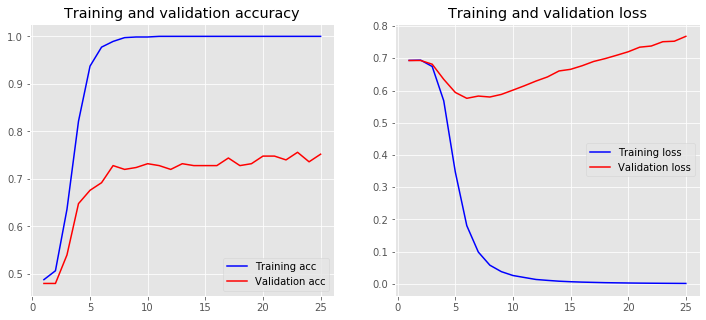

In [24]:
plot_history(history)

In [30]:
from keras.layers import GlobalMaxPool1D

embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


Train on 750 samples, validate on 250 samples
Epoch 1/50
750/750 [==============================] - 0s 370us/step - loss: 0.6915 - acc: 0.5067 - val_loss: 0.6894 - val_acc: 0.4840
Epoch 2/50
750/750 [==============================] - 0s 300us/step - loss: 0.6705 - acc: 0.6907 - val_loss: 0.6687 - val_acc: 0.6520
Epoch 3/50
750/750 [==============================] - 0s 264us/step - loss: 0.6012 - acc: 0.8347 - val_loss: 0.6141 - val_acc: 0.7480
Epoch 4/50
750/750 [==============================] - 0s 293us/step - loss: 0.4663 - acc: 0.8973 - val_loss: 0.5378 - val_acc: 0.7840
Epoch 5/50
750/750 [==============================] - 0s 273us/step - loss: 0.3138 - acc: 0.9507 - val_loss: 0.4687 - val_acc: 0.8000
Epoch 6/50
750/750 [==============================] - 0s 280us/step - loss: 0.1931 - acc: 0.9733 - val_loss: 0.4334 - val_acc: 0.8040
Epoch 7/50
750/750 [==============================] - 0s 293us/step - loss: 0.1183 - acc: 0.9840 - val_loss: 0.4139 - val_acc: 0.8160
Epoch 8/50
750/7

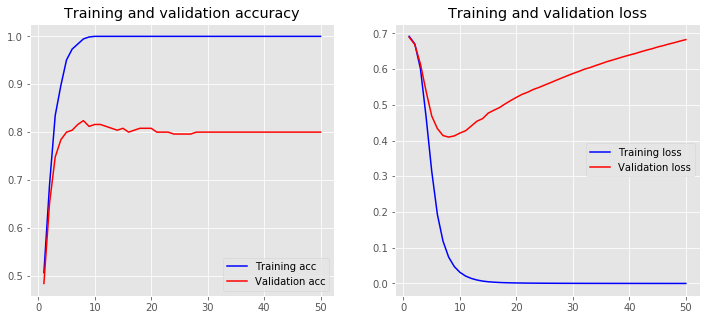

In [33]:
history = model.fit(x_train, label_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, label_test),
                    batch_size=10)
loss, accuracy = model.evaluate(x_train, label_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, label_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)